In [196]:
#Importing all required modules

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [123]:
data = pd.read_csv("data (1).csv")
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [124]:
#I have imported the data succesfully without any errors

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [126]:
#From info() I found out that there are 944 entries in each attribute with data type as int64(10)

In [127]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [128]:
#Using describe() I understood the basic Statistics of the dataset

In [129]:
(data.isnull()).sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [130]:
#By executing the above code I found there are no missing data in the dataset

In [131]:
print((data["fail"] == 1).sum())
print((data["fail"] == 0).sum())

393
551


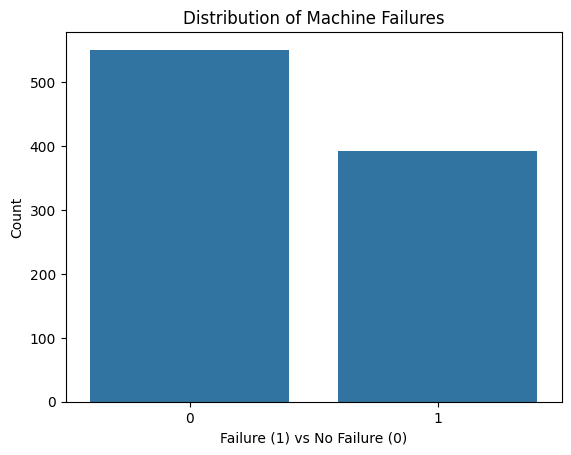

In [132]:
sns.countplot(x='fail', data=data)
plt.title('Distribution of Machine Failures')
plt.xlabel('Failure (1) vs No Failure (0)')
plt.ylabel('Count')
plt.show()

In [133]:
#Made a simple bar graph for the distribution of target count

In [134]:
#Now lets find the correlation between each attribute

In [135]:
data_corr = data.corr()
df = pd.DataFrame(data_corr)
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


In [136]:
#Now lets get the correlation of each attribute with "fail" attribute

In [137]:
print(data_corr["fail"])

footfall      -0.073066
tempMode      -0.014462
AQ             0.583238
USS           -0.466574
CS             0.018855
VOC            0.797329
RP             0.053668
IP             0.085624
Temperature    0.190257
fail           1.000000
Name: fail, dtype: float64


In [138]:
#footfall has 0.73 negative correlation | VOC has 0.79 of positive correlation | 

In [139]:
#lets represent the correlation in Heatmap for data visualization

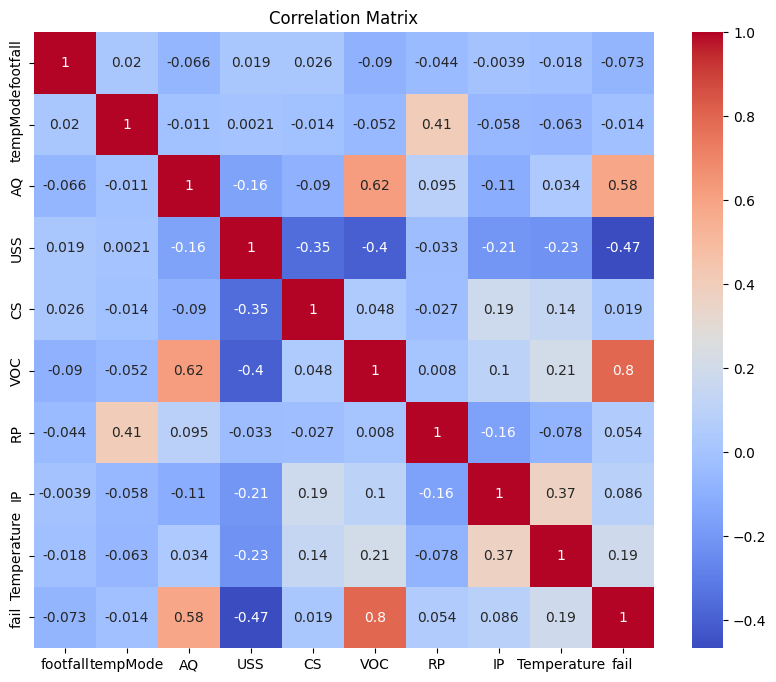

In [140]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [141]:
#Lets check how much Temperature affects Machine fails

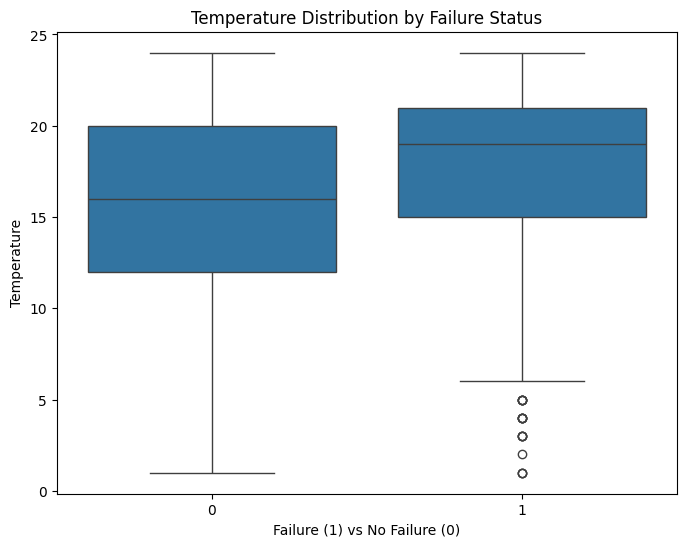

In [142]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fail', y='Temperature', data=data)
plt.title('Temperature Distribution by Failure Status')
plt.xlabel('Failure (1) vs No Failure (0)')
plt.ylabel('Temperature')
plt.show()

In [143]:
#Lets go on with models

In [144]:
#Seperating Independent variable to X and Dependend variable to y

In [145]:
X = data.drop("fail",axis=1)
y = data['fail']

In [158]:
#Lets use SMOTE to Balance the Dataset

In [159]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [160]:
#Training data with train_test_split(() 80% to Train 20% for Test

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [162]:
#Applying Normalization to scale the dataset for better accuracy

In [163]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
#With the help of GOOGLE I found out there are other models used to train binary output model some are: 
#[Logistic Regression,Random Forest Classifier,Gradient Boosting Classifier,Support Vector Machine (SVM),K-Nearest Neighbors (KNN)]

In [165]:
#Hence I'm going to train all model and compare the accurary level to train my main model

In [166]:
test_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [167]:
#I'm scoring Accuracy, Precision, Recall, f1, roc_auc

In [168]:
results = []
for name,model in test_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = int((accuracy_score(y_test, y_pred))*100)
    precision = int((precision_score(y_test, y_pred))*100)
    recall = int((recall_score(y_test, y_pred))*100)
    f1 = int((f1_score(y_test, y_pred))*100)
    roc_auc = int((roc_auc_score(y_test, y_pred))*100)
    total_score = (sum([accuracy, precision, recall, f1, roc_auc])/500)*100
    results.append([name,accuracy, precision, recall, f1, roc_auc, total_score])

In [169]:
#Lets check the result in Percentage

In [170]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC','Total_Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Total_Score
0,Logistic Regression,91,89,93,91,91,91.0
1,Random Forest,90,91,88,90,90,89.8
2,Gradient Boosting,90,91,89,90,90,90.0
3,SVM,91,92,91,92,91,91.4
4,KNN,89,88,91,90,89,89.4


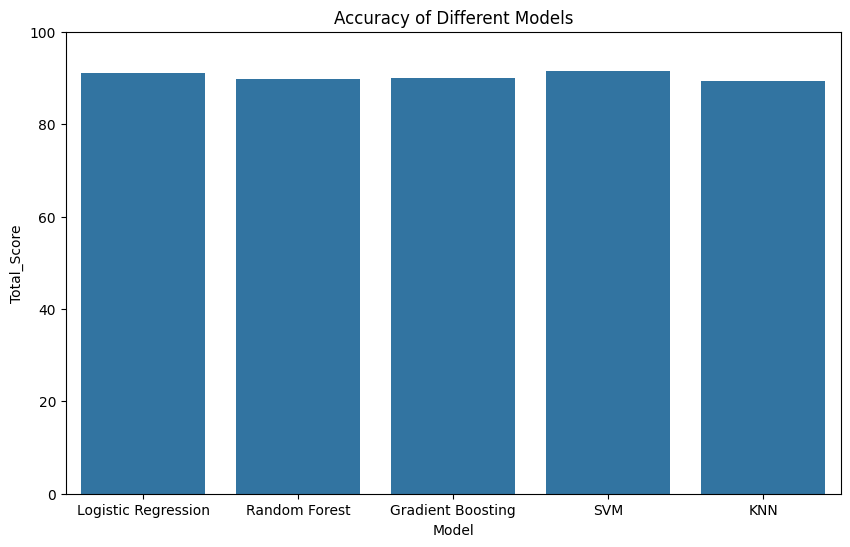

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Total_Score', data=results_df)
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.show()

In [178]:
#SVM Algorithms scored the highest with Total Score of 91.4%

In [179]:
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [180]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [181]:
#Lets predict by inputing custom data

In [195]:
arr = np.array([31, 4, 6, 2, 2, 1, 45, 2, 2]).reshape(1, -1)
prediction = model.predict(arr)
if prediction[0] == 1:
    print("Prediction: The machine will FAIL.")
else:
    print("Prediction: The machine will NOT FAIL.")

Prediction: The machine will NOT FAIL.
